ALL NEEDED IMPORT

In [81]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
sns.set()

READING AND UNDERSTANDING THE DATA

In [82]:
vehicle = pd.read_csv("vehicle_trade_data.csv")
vehicle

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,make_model,age
0,202010014440649,31534.0,17,Grey,MINI,Hatch,USED,2017.0,19000,Hatchback,False,Petrol,MINI - Hatch,5
1,202010155026725,52023.0,66,Blue,Volkswagen,Golf,USED,2016.0,13500,Estate,False,Diesel,Volkswagen - Golf,6
2,202008142485309,29500.0,12,Grey,Mercedes-Benz,C Class,USED,2012.0,9495,Saloon,False,Petrol,Mercedes-Benz - C Class,10
3,202009183894045,35300.0,18,Grey,Vauxhall,Corsa,USED,2018.0,7293,Hatchback,False,Petrol,Vauxhall - Corsa,4
4,202010014441671,47299.0,65,Black,Nissan,Qashqai,USED,2016.0,11500,SUV,False,Diesel,Nissan - Qashqai,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96264,202010295556637,28225.0,17,White,Mercedes-Benz,C Class,USED,2017.0,18499,Saloon,False,Diesel,Mercedes-Benz - C Class,5
96265,202010305614799,122000.0,07,Silver,BMW,3 Series,USED,2007.0,1990,Saloon,False,Petrol,BMW - 3 Series,15
96266,202010315639231,45000.0,15,Silver,Vauxhall,Corsa,USED,2015.0,5000,Hatchback,False,Petrol,Vauxhall - Corsa,7
96267,202010315647416,4075.0,69,Grey,Nissan,Juke,USED,2019.0,18000,SUV,False,Petrol,Nissan - Juke,3


In [83]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96269 entries, 0 to 96268
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_reference       96269 non-null  int64  
 1   mileage                96247 non-null  float64
 2   reg_code               96257 non-null  object 
 3   standard_colour        96269 non-null  object 
 4   standard_make          96269 non-null  object 
 5   standard_model         96269 non-null  object 
 6   vehicle_condition      96269 non-null  object 
 7   year_of_registration   96269 non-null  float64
 8   price                  96269 non-null  int64  
 9   body_type              96269 non-null  object 
 10  crossover_car_and_van  96269 non-null  bool   
 11  fuel_type              96269 non-null  object 
 12  make_model             96269 non-null  object 
 13  age                    96269 non-null  int64  
dtypes: bool(1), float64(2), int64(3), object(8)
memory usa

In [84]:
vehicle.head(10)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,make_model,age
0,202010014440649,31534.0,17,Grey,MINI,Hatch,USED,2017.0,19000,Hatchback,False,Petrol,MINI - Hatch,5
1,202010155026725,52023.0,66,Blue,Volkswagen,Golf,USED,2016.0,13500,Estate,False,Diesel,Volkswagen - Golf,6
2,202008142485309,29500.0,12,Grey,Mercedes-Benz,C Class,USED,2012.0,9495,Saloon,False,Petrol,Mercedes-Benz - C Class,10
3,202009183894045,35300.0,18,Grey,Vauxhall,Corsa,USED,2018.0,7293,Hatchback,False,Petrol,Vauxhall - Corsa,4
4,202010014441671,47299.0,65,Black,Nissan,Qashqai,USED,2016.0,11500,SUV,False,Diesel,Nissan - Qashqai,6
5,202010235355785,7990.0,19,Black,Toyota,Yaris,USED,2019.0,11147,Hatchback,False,Petrol,Toyota - Yaris,3
6,202010155027121,17020.0,17,Grey,Vauxhall,Corsa,USED,2017.0,6795,Hatchback,False,Petrol,Vauxhall - Corsa,5
7,202002137274498,35000.0,64,Black,Volkswagen,Golf,USED,2014.0,14500,Hatchback,False,Diesel,Volkswagen - Golf,8
8,202006150161276,61760.0,09,Silver,Vauxhall,Corsa,USED,2009.0,2295,Hatchback,False,Petrol,Vauxhall - Corsa,13
9,202006260546963,64785.0,61,Silver,Volkswagen,Polo,USED,2011.0,4995,Hatchback,False,Diesel,Volkswagen - Polo,11


In [85]:
vehicle.tail(10)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,make_model,age
96259,202010275480505,93000.0,61,Black,Nissan,Juke,USED,2011.0,4490,SUV,False,Petrol,Nissan - Juke,11
96260,202010285515611,50000.0,63,Black,Mercedes-Benz,E Class,USED,2014.0,11995,Estate,False,Diesel,Mercedes-Benz - E Class,8
96261,202010285515718,100000.0,59,Silver,BMW,3 Series,USED,2010.0,4395,Saloon,False,Diesel,BMW - 3 Series,12
96262,202010285527271,22153.0,18,Blue,Mercedes-Benz,C Class,USED,2018.0,20800,Saloon,False,Diesel,Mercedes-Benz - C Class,4
96263,202010285546060,44000.0,64,Silver,Vauxhall,Corsa,USED,2014.0,4250,Hatchback,False,Petrol,Vauxhall - Corsa,8
96264,202010295556637,28225.0,17,White,Mercedes-Benz,C Class,USED,2017.0,18499,Saloon,False,Diesel,Mercedes-Benz - C Class,5
96265,202010305614799,122000.0,07,Silver,BMW,3 Series,USED,2007.0,1990,Saloon,False,Petrol,BMW - 3 Series,15
96266,202010315639231,45000.0,15,Silver,Vauxhall,Corsa,USED,2015.0,5000,Hatchback,False,Petrol,Vauxhall - Corsa,7
96267,202010315647416,4075.0,69,Grey,Nissan,Juke,USED,2019.0,18000,SUV,False,Petrol,Nissan - Juke,3
96268,202010315659271,52760.0,62,White,Nissan,Qashqai,USED,2012.0,7250,SUV,False,Petrol,Nissan - Qashqai,10


In [86]:
#vehicle.describe()
print(vehicle.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))



       public_reference        mileage  year_of_registration          price  \
count      9.626900e+04   96247.000000          96269.000000   96269.000000   
mean       2.020082e+14   42964.067150           2015.096075   12266.081615   
std        1.194558e+10   34051.708175              3.766205    7414.823331   
min        2.014120e+14       0.000000           1962.000000     200.000000   
25%        2.020091e+14   17000.000000           2013.000000    6999.000000   
50%        2.020100e+14   34352.000000           2016.000000   11030.000000   
75%        2.020102e+14   62000.000000           2018.000000   15999.000000   
85%        2.020102e+14   80000.000000           2019.000000   19300.000000   
90%        2.020103e+14   91459.800000           2019.000000   21990.000000   
100%       2.020110e+14  999999.000000           2020.000000  158500.000000   
max        2.020110e+14  999999.000000           2020.000000  158500.000000   

                age  
count  96269.000000  
mean   

INFERENCE:
    
QUANTITATIVE DATA

mileage has a total of 96247 non-null values out of a total of 96269 entries,
which means there are missing values. It's metrics are as follows:
    -Average mileage ~ 42954.25
    -'Maximum mileage` = 999999.0
    -Standard deviation = 34051.53
    
Year of registration has a total of 96269 non- null values, i.e there are no missing values.
Metrics are as follows:
    -Average year = 2015
    -Maximum year = 2020
    -Standard deviation = 3.8
    
Price has a total of 96269 non- null values, i.e there are no missing values. 
Metrics are as follows:
    -Average price = 12266.08
    -Maximum price = 158500
    -Standard deviation = 7414.78
    
Age' has a total of 96269 non- null values, i.e there are no missing values.
Metrics are as follows:
    -Average age ~ 7
    -Maximum age = 60
    -Standard deviation= 3.8

In [87]:
sum_black=(vehicle['standard_colour']=='Black').sum()
(sum_black/len(vehicle.standard_colour))*100

27.5052197488288

In [88]:
sum_black=(vehicle['standard_model']=='Golf').sum()
(sum_black/len(vehicle.standard_make))*100

9.322834972836532

In [89]:
sum_black=(vehicle['standard_make']=='BMW').sum()
(sum_black/len(vehicle.standard_make))*100

17.227768025013244

In [90]:
sum_black=(vehicle['body_type']=='Hatchback').sum()
(sum_black/len(vehicle.body_type))*100

61.52240077283445

In [91]:
sum_black=(vehicle['fuel_type']=='Petrol').sum()
(sum_black/len(vehicle.fuel_type))*100

56.92902180348815

QUALITATIVE DATA

standard colour: it's metrics:
    most occurrent: Black
    percent: 27.5%
        
standard model: it's metrics:
    most occurrent: Golf
    percent: 9.3%
        
standard make: it's metrics:
    most occurrent: BMW
    percent: 17.2%
        
body type: it's metrics:
    most occurrent: Hatchback
    percent: 61.5%
        
fuel type: it's metrics:
    most occurrent: Petrol
    percent: 56.9%

In [93]:
vehicle.describe(include = "O")

,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,body_type,fuel_type,make_model
count,96257,96269,96269,96269,96269,96269,96269,96269
unique,58,5,11,19,1,5,2,19
top,17,Black,BMW,Golf,USED,Hatchback,Petrol,Volkswagen - Golf
freq,10218,26479,16585,8975,96269,59227,54805,8975


In [94]:
vehicle.shape

(96269, 14)

In [95]:
vehicle.standard_colour.unique()

array(['Grey', 'Blue', 'Black', 'Silver', 'White'], dtype=object)

In [96]:
vehicle.standard_model.unique()

array(['Hatch', 'Golf', 'C Class', 'Corsa', 'Qashqai', 'Yaris', 'Polo',
       'Astra', 'A1', 'E Class', 'Clio', 'A Class', '5 Series',
       '1 Series', '500', 'A3', 'Sportage', '3 Series', 'Juke'],
      dtype=object)

In [97]:
vehicle.age.unique()

array([ 5,  6, 10,  4,  3,  8, 13, 11,  2, 12,  7, 14,  9, 20, 15, 18, 16,
       19, 24, 17, 28, 27, 21, 22, 25, 23, 26, 32, 36, 39, 33, 29, 30, 34,
       31, 52, 60, 59], dtype=int64)

In [98]:
vehicle.year_of_registration.unique()

array([2017., 2016., 2012., 2018., 2019., 2014., 2009., 2011., 2020.,
       2010., 2015., 2008., 2013., 2002., 2007., 2004., 2006., 2003.,
       1998., 2005., 1994., 1995., 2001., 2000., 1997., 1999., 1996.,
       1990., 1986., 1983., 1989., 1993., 1992., 1988., 1991., 1970.,
       1962., 1963.])

In [99]:
count_colour= vehicle['standard_colour']=="Grey"
count_colour.sum()

16986

VISUALIZING THE DATA

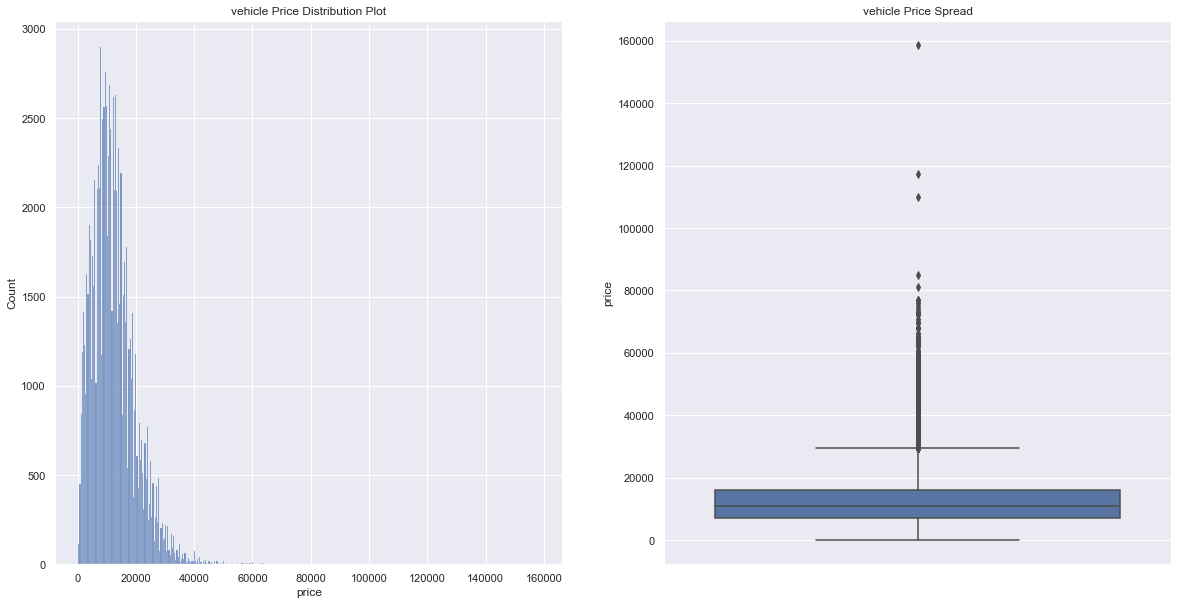

In [100]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('vehicle Price Distribution Plot')
sns.histplot(vehicle.price)

plt.subplot(1,2,2)
plt.title('vehicle Price Spread')
sns.boxplot(y=vehicle.price)

plt.show()

# VISUALISING CATEGORICAL DATA

-standard_colour           
-standard_make   
-fuel_type  
-body_type  
-price 
-year_of_registration
-mileage
-age      

       
    
                    
              



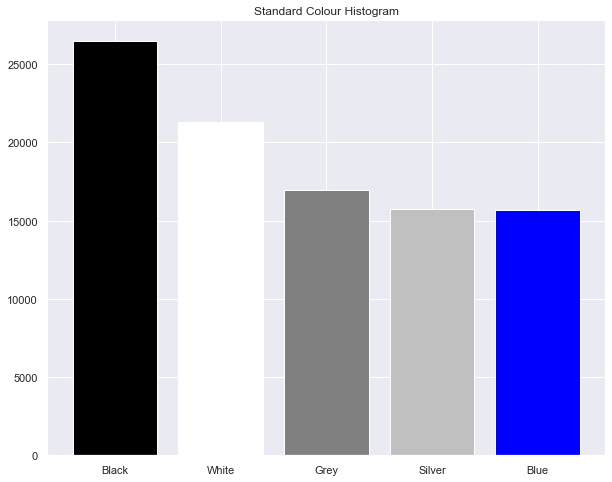

In [101]:
plt.figure(figsize=(10,8))

plt.title('Standard Colour Histogram')
values_of_standard_colour = vehicle.standard_colour.value_counts() 
plt.bar(values_of_standard_colour.index, values_of_standard_colour, color = ['black','w','grey','silver','blue'])

plt.show()

INFERENCE:
    *Black as the highest number of standard color cars compare to the Blue which shows the lowest standard color car.
    *Standard_colour: consists of vehicle colour at the time of sales which are:
    -Black
    -Grey
    -Blue
    -Silver
    -White

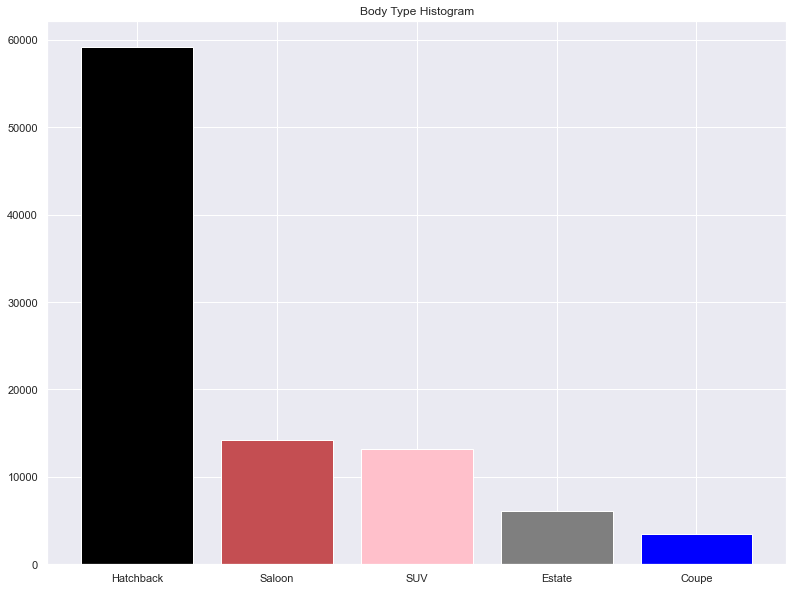

In [102]:
plt.figure(figsize=(45, 10))

#plt.subplot(1,3,1)
#plt.title('vehicle standard make Histogram')
#values_of_standard_make = vehicle.standard_make.value_counts() 
#plt.bar(values_of_standard_make.index, values_of_standard_make)

#plt.subplot(1,3,2)
#plt.title('Fuel Type Histogram')
#values_of_fuel_type = vehicle.fuel_type.value_counts() 
#plt.bar(values_of_fuel_type.index, values_of_fuel_type,  color = ['r', 'black'])

plt.subplot(1,3,3)
plt.title('Body Type Histogram')
values_of_body_type = vehicle.body_type.value_counts() 
plt.bar(values_of_body_type.index, values_of_body_type, color = ['black','r','pink','tab:gray','blue'])



plt.show()



INFERENCE:
   * BMW seemed to be favored car brand under the standard make. standard_make: which represents Car brand
    -MINI
    -Volkswagen
    -Mercedes-Benz
    -Vauxhall
    -Nissan
    -Toyota
    -Audi
    -Renault
    -BMW
    -Fiat
    -Kia
    
   * Petrol are most common type of fuel systems.i.e., Number of petrol Fueled cars are more than Diesel. Fuel_type: fuel the   vehicle uses
    -Petrol
    -Diesel

   * Hatchback is the top body type prefered. Body_type: body shape of vehicle
    -Hatchback
    -Estate
    -Saloon
    -SUV
    -Coupe
    

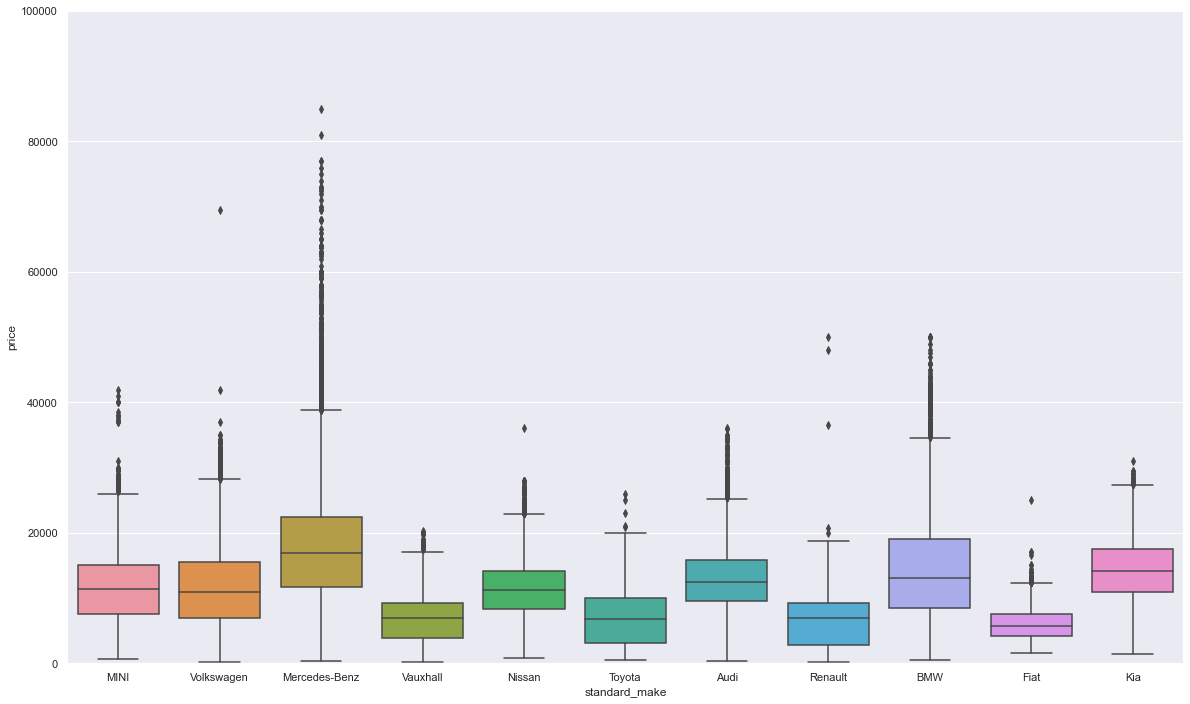

In [103]:
#plt.figure(figsize=(50,10))

#plt.subplot(1,4,1)
#plt.title('Standard Make Histogram')
#values_of_standard_make = vehicle.standard_make.value_counts()
#plt.bar(values_of_standard_make.index, values_of_standard_make, color=("darkmagenta"))


#plt.subplot(1,4,2)
value = 'standard_make'
data = pd.concat([vehicle['price'], vehicle[value]], axis=1)
f, ax = plt.subplots(figsize=(20, 12))
fig = sns.boxplot(x=value, y="price", data=data)
fig.axis(ymin=0, ymax=100000);

In [ ]:
# INFERENCE:
    *It seems that the Standard Make with BMW and Mercedes Benz values have high number of rows (i.e. They are most sold.), but there are few data for other categories to derive any meaningful inference
                                                                               
    *The vehicle with Mercedes Benz seems to be high priced (as it makes sense too, insurance risk rating is quite good). 
     But it seems that standard make of Toyota value has the price range similar to peanult value. There is a dip in price at Fiat.

 VISUALISING NUMERICAL DATA

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


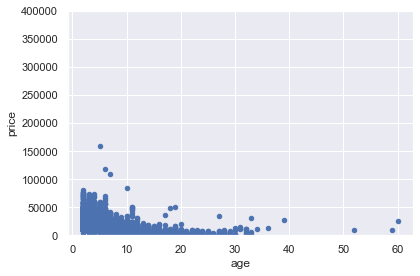

In [104]:
 # Scatter plot Mileage / Price
    
#plt.figure(figsize=(10,20))
value = 'mileage'
#data = pd.concat([vehicle['price'], vehicle[value]], axis=1)
#data.plot.scatter(x=value, y='price', ylim=(0,300000));


# Scatter plot Year Of Registration / Price

#value = 'year_of_registration'
#data = pd.concat([vehicle['price'], vehicle[value]], axis=1)
#data.plot.scatter(x=value, y='price', ylim=(0,400000))
#plt.xticks([x for x in range(1960, 2023, 8)])

# Scatter plot Age / Price

value = 'age'
data = pd.concat([vehicle['price'], vehicle[value]], axis=1)
data.plot.scatter(x=value, y='price', ylim=(0,400000))

plt.tight_layout()


In [ ]:
INFERENCE:
    
    *Mileage represents distance the vehicle travelled throughout it's lifetime. it  seems to have a significant positive correlation with price. i.e., Price and Mileage are positively correlated.
    
    *Year Of Registration doesn't show any significant trend with price. It seem to have a significant negative correlation with price. I.e., Price and Year Of Registration are negatively correlated.
    
    *Age represents the year vehicle was bought taken from current year. it  seems to have a positive correlation with price.
    
    *Price: represents the cost of vehicle.
    
    

In [105]:
np.corrcoef(vehicle['mileage'], vehicle['age'])[0, 1]

nan

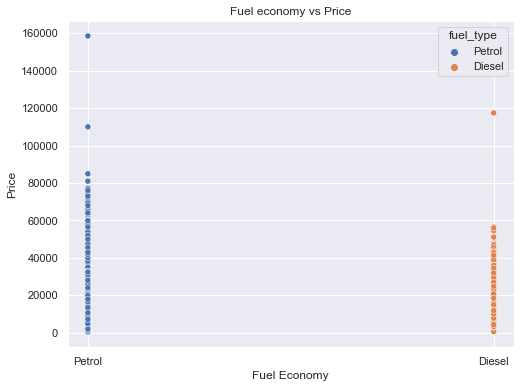

In [106]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=vehicle['fuel_type'],y=vehicle['price'],hue=vehicle['fuel_type'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()


INFERENCE:

    *fueleconomy has an obvious positive correlation with price and is significant.

DATA CLEANING

In [107]:
clean_vehicle = vehicle[~vehicle.mileage.isnull()]
clean_vehicle


,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,make_model,age
0,202010014440649,31534.0,17,Grey,MINI,Hatch,USED,2017.0,19000,Hatchback,False,Petrol,MINI - Hatch,5
1,202010155026725,52023.0,66,Blue,Volkswagen,Golf,USED,2016.0,13500,Estate,False,Diesel,Volkswagen - Golf,6
2,202008142485309,29500.0,12,Grey,Mercedes-Benz,C Class,USED,2012.0,9495,Saloon,False,Petrol,Mercedes-Benz - C Class,10
3,202009183894045,35300.0,18,Grey,Vauxhall,Corsa,USED,2018.0,7293,Hatchback,False,Petrol,Vauxhall - Corsa,4
4,202010014441671,47299.0,65,Black,Nissan,Qashqai,USED,2016.0,11500,SUV,False,Diesel,Nissan - Qashqai,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96264,202010295556637,28225.0,17,White,Mercedes-Benz,C Class,USED,2017.0,18499,Saloon,False,Diesel,Mercedes-Benz - C Class,5
96265,202010305614799,122000.0,07,Silver,BMW,3 Series,USED,2007.0,1990,Saloon,False,Petrol,BMW - 3 Series,15
96266,202010315639231,45000.0,15,Silver,Vauxhall,Corsa,USED,2015.0,5000,Hatchback,False,Petrol,Vauxhall - Corsa,7
96267,202010315647416,4075.0,69,Grey,Nissan,Juke,USED,2019.0,18000,SUV,False,Petrol,Nissan - Juke,3


In [108]:
clean_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96247 entries, 0 to 96268
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_reference       96247 non-null  int64  
 1   mileage                96247 non-null  float64
 2   reg_code               96235 non-null  object 
 3   standard_colour        96247 non-null  object 
 4   standard_make          96247 non-null  object 
 5   standard_model         96247 non-null  object 
 6   vehicle_condition      96247 non-null  object 
 7   year_of_registration   96247 non-null  float64
 8   price                  96247 non-null  int64  
 9   body_type              96247 non-null  object 
 10  crossover_car_and_van  96247 non-null  bool   
 11  fuel_type              96247 non-null  object 
 12  make_model             96247 non-null  object 
 13  age                    96247 non-null  int64  
dtypes: bool(1), float64(2), int64(3), object(8)
memory usa

In [109]:
Clean= clean_vehicle.drop(columns=['crossover_car_and_van', 'public_reference','reg_code','vehicle_condition'])
Clean

,mileage,standard_colour,standard_make,standard_model,year_of_registration,price,body_type,fuel_type,make_model,age
0,31534.0,Grey,MINI,Hatch,2017.0,19000,Hatchback,Petrol,MINI - Hatch,5
1,52023.0,Blue,Volkswagen,Golf,2016.0,13500,Estate,Diesel,Volkswagen - Golf,6
2,29500.0,Grey,Mercedes-Benz,C Class,2012.0,9495,Saloon,Petrol,Mercedes-Benz - C Class,10
3,35300.0,Grey,Vauxhall,Corsa,2018.0,7293,Hatchback,Petrol,Vauxhall - Corsa,4
4,47299.0,Black,Nissan,Qashqai,2016.0,11500,SUV,Diesel,Nissan - Qashqai,6
...,...,...,...,...,...,...,...,...,...,...
96264,28225.0,White,Mercedes-Benz,C Class,2017.0,18499,Saloon,Diesel,Mercedes-Benz - C Class,5
96265,122000.0,Silver,BMW,3 Series,2007.0,1990,Saloon,Petrol,BMW - 3 Series,15
96266,45000.0,Silver,Vauxhall,Corsa,2015.0,5000,Hatchback,Petrol,Vauxhall - Corsa,7
96267,4075.0,Grey,Nissan,Juke,2019.0,18000,SUV,Petrol,Nissan - Juke,3


In [110]:
Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96247 entries, 0 to 96268
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mileage               96247 non-null  float64
 1   standard_colour       96247 non-null  object 
 2   standard_make         96247 non-null  object 
 3   standard_model        96247 non-null  object 
 4   year_of_registration  96247 non-null  float64
 5   price                 96247 non-null  int64  
 6   body_type             96247 non-null  object 
 7   fuel_type             96247 non-null  object 
 8   make_model            96247 non-null  object 
 9   age                   96247 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 8.1+ MB


In [ ]:
INFERENCE:
    *The crossover_car_nad_van, public_reference, reg_code and vehicle_condition columns was dropped because it doesn't provide useful correlation to price  

HANDLING OUTLINERS

In [111]:
#Removing the outliers (IQR Method)

def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
 
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]
    return filtered_data

In [112]:
outlier_free_mileage = removeOutliers(Clean, 'mileage')
outlier_free_p =   removeOutliers(outlier_free_mileage, 'year_of_registration')
outlier_free_set =    removeOutliers(outlier_free_p, "price")
outlier_free_age = removeOutliers(outlier_free_set, "age")
outlier_free_data = outlier_free_age


IQR value for column mileage is: 45000.0
IQR value for column year_of_registration is: 5.0
IQR value for column price is: 8799.0
IQR value for column age is: 3.0


# INFERENCE:
    The values for IQR for each column is as listed below:
    -IQR value for column mileage is: 45000.0
    -IQR value for column year_of_registration is: 5.0
    -IQR value for column price is: 8799.0
    -IQR value for column age is: 3.0
       

In [113]:
for col in outlier_free_data.columns.tolist():          
        print('{} column missing values: {}'.format(col, outlier_free_data[col].isnull().sum()))

mileage column missing values: 0
standard_colour column missing values: 0
standard_make column missing values: 0
standard_model column missing values: 0
year_of_registration column missing values: 0
price column missing values: 0
body_type column missing values: 0
fuel_type column missing values: 0
make_model column missing values: 0
age column missing values: 0


In [115]:
clean_off = outlier_free_data
clean_off.head()
#len(clean_off.mileage)

,mileage,standard_colour,standard_make,standard_model,year_of_registration,price,body_type,fuel_type,make_model,age
0,31534.0,Grey,MINI,Hatch,2017.0,19000,Hatchback,Petrol,MINI - Hatch,5
1,52023.0,Blue,Volkswagen,Golf,2016.0,13500,Estate,Diesel,Volkswagen - Golf,6
2,29500.0,Grey,Mercedes-Benz,C Class,2012.0,9495,Saloon,Petrol,Mercedes-Benz - C Class,10
3,35300.0,Grey,Vauxhall,Corsa,2018.0,7293,Hatchback,Petrol,Vauxhall - Corsa,4
4,47299.0,Black,Nissan,Qashqai,2016.0,11500,SUV,Diesel,Nissan - Qashqai,6


# LIST OF SIGNIFICANT VARIABLES AFTER VISUAL ANALYSIS :
    -standard_colour
    -standard_make
    -standard_model
    -body_type
    -fuel_type
    -price
    -year_of_registration
    -mileage
    -age

In [116]:
vehicle_lr = vehicle[['price','standard_colour', 'standard_make','standard_model','body_type','fuel_type','age','year_of_registration','mileage']]
vehicle_lr.head()

,price,standard_colour,standard_make,standard_model,body_type,fuel_type,age,year_of_registration,mileage
0,19000,Grey,MINI,Hatch,Hatchback,Petrol,5,2017.0,31534.0
1,13500,Blue,Volkswagen,Golf,Estate,Diesel,6,2016.0,52023.0
2,9495,Grey,Mercedes-Benz,C Class,Saloon,Petrol,10,2012.0,29500.0
3,7293,Grey,Vauxhall,Corsa,Hatchback,Petrol,4,2018.0,35300.0
4,11500,Black,Nissan,Qashqai,SUV,Diesel,6,2016.0,47299.0


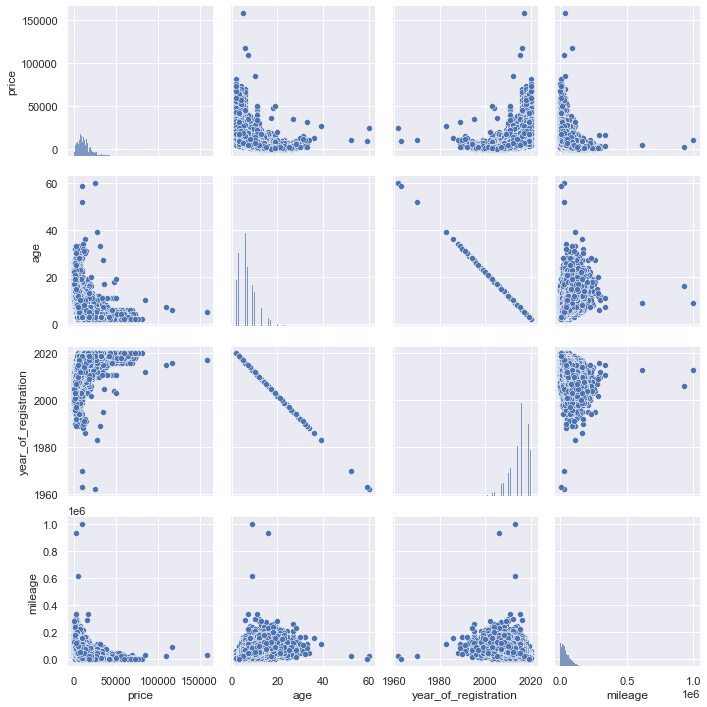

In [117]:
sns.pairplot(vehicle_lr)
plt.show()

# MODEL:
TRAIN-TEST SPLIT AND FEATURE SCALING

In [118]:
lm = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

df = preprocessing.LabelEncoder()



In [119]:
clean_off['standard_colour'] = df.fit_transform(clean_off['standard_colour'])
clean_off['standard_make'] = df.fit_transform(clean_off['standard_make'])
clean_off['standard_model'] = df.fit_transform(clean_off['standard_model'])
clean_off['body_type'] = df.fit_transform(clean_off['body_type'])
clean_off['fuel_type'] = df.fit_transform(clean_off['fuel_type'])
clean_off['make_model'] = df.fit_transform(clean_off['make_model'])



In [120]:
clean_off.head()

,mileage,standard_colour,standard_make,standard_model,year_of_registration,price,body_type,fuel_type,make_model,age
0,31534.0,2,4,13,2017.0,19000,2,1,7,5
1,52023.0,1,10,12,2016.0,13500,1,0,17,6
2,29500.0,2,5,8,2012.0,9495,4,1,9,10
3,35300.0,2,9,10,2018.0,7293,2,1,16,4
4,47299.0,0,6,16,2016.0,11500,3,0,12,6


In [121]:
clean_off.describe()

,mileage,standard_colour,standard_make,standard_model,year_of_registration,price,body_type,fuel_type,make_model,age
count,84072.000000,84072.000000,84072.000000,84072.000000,84072.000000,84072.000000,84072.000000,84072.000000,84072.000000,84072.000000
mean,37679.036433,1.914775,5.165120,8.868149,2015.915323,12634.307808,2.311685,0.558557,9.458595,6.084677
std,27513.025114,1.536046,3.456518,5.261452,2.573436,5887.827095,0.885363,0.496562,5.739188,2.573436
min,0.000000,0.000000,0.000000,0.000000,2010.000000,795.000000,0.000000,0.000000,0.000000,2.000000
25%,16224.500000,0.000000,1.000000,4.000000,2014.000000,8295.000000,2.000000,0.000000,4.000000,4.000000
50%,31513.500000,2.000000,5.000000,9.000000,2016.000000,11800.000000,2.000000,1.000000,9.000000,6.000000
75%,54000.000000,3.000000,9.000000,13.000000,2018.000000,16200.000000,3.000000,1.000000,15.000000,8.000000
max,129463.000000,4.000000,10.000000,18.000000,2020.000000,29495.000000,4.000000,1.000000,18.000000,12.000000


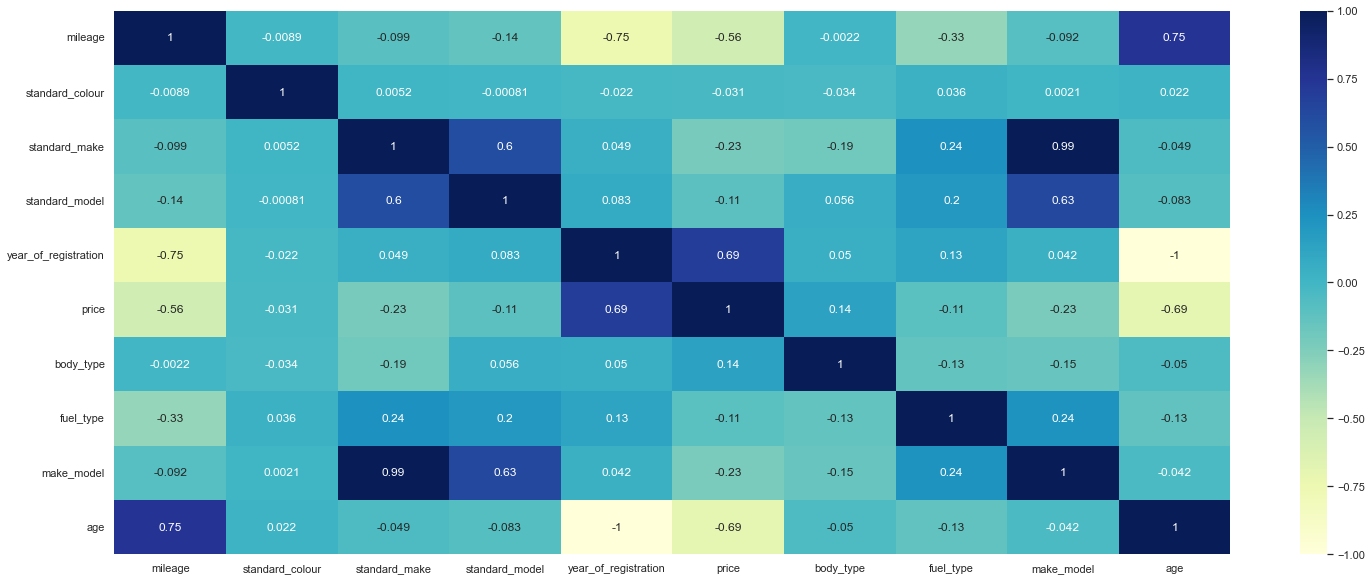

In [122]:
#Correlation using heatmap
plt.figure(figsize = (25, 10))
sns.heatmap(clean_off.corr(), annot = True, cmap="YlGnBu")
plt.show()

# INFERENCE:
    *Highly correlated variables to price are - mileage, age and year_of-registration.

In [123]:
x = clean_off.loc[:, Clean.columns != "price"]
y = clean_off.price

In [124]:
x.head(11)

,mileage,standard_colour,standard_make,standard_model,year_of_registration,body_type,fuel_type,make_model,age
0,31534.0,2,4,13,2017.0,2,1,7,5
1,52023.0,1,10,12,2016.0,1,0,17,6
2,29500.0,2,5,8,2012.0,4,1,9,10
3,35300.0,2,9,10,2018.0,2,1,16,4
4,47299.0,0,6,16,2016.0,3,0,12,6
5,7990.0,0,8,18,2019.0,2,1,14,3
6,17020.0,2,9,10,2017.0,2,1,16,5
7,35000.0,0,10,12,2014.0,2,0,17,8
9,64785.0,3,10,15,2011.0,2,0,18,11
10,117420.0,3,9,7,2011.0,1,0,15,11


In [125]:
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size = 0.3, train_size = 0.7, random_state = 20)

In [126]:
lm.fit(x_train, y_train)
b_predt = lm.predict(x_train)
b_predt

array([13246.64572847,  8769.36823233,  3366.17331689, ...,
       16431.07560174, 16491.88738035, 15354.41478449])

In [127]:
b_preds = lm.predict(x_test)

In [128]:
lm.predict([[31534.0,2, 4,13,2017.0,2,1,7,5]])

array([13562.4686257])

In [129]:
lm.coef_

array([-5.07266224e-02, -4.60706461e+01,  1.19284605e+02, -3.09495675e+01,
        6.19153533e+02,  4.07053421e+02, -2.27602503e+03, -2.76764259e+02,
       -6.19153533e+02])

In [130]:
lm.intercept_

-1227158.2106144985

Text(0.5, 0, 'Errors')

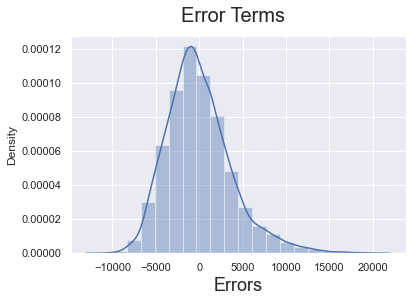

In [131]:
#Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - b_predt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)   

# INFERENCE:
    Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

# EVALUATION OF TEST VIA COMPARISON OF y_pred and y_test

In [132]:
y_pred = lm.predict(x_test)
r2_score(y_test, y_pred)


0.5876729589803258

Text(0, 0.5, 'y_pred')

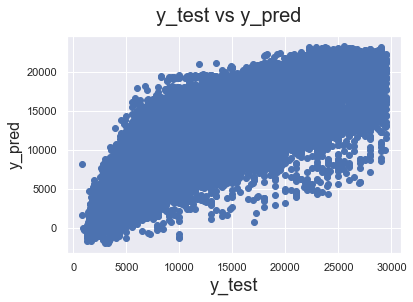

In [133]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)

# INFERENCE:
    Approximately 59% of the data set fits the linear regression model.